In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dataset.csv')
print(data.head())

                                               Title Rating Reviews   Price  \
0  Redmi Note 13 Pro+ (Fusion Black, 8GB RAM, 256...    3.8     684  33,999   
1  Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...    3.8      60   9,999   
2  realme NARZO N61 (Marble Black,6GB RAM+128GB S...    4.1     346  10,999   
3  realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...    4.1     346  10,999   
4            POCO C61 Ethereal Blue 4GB RAM 64GB ROM    3.5      27   8,999   

                                           Image URL  \
0  https://m.media-amazon.com/images/I/71nrf4zgq5...   
1  https://m.media-amazon.com/images/I/81T3olLXpU...   
2  https://m.media-amazon.com/images/I/71EN6N9kUE...   
3  https://m.media-amazon.com/images/I/71r0Ysx+oV...   
4  https://m.media-amazon.com/images/I/712tqhtIw1...   

                                         Product URL  
0  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...  
1  https://www.amazon.in/Samsung-Storage-Display-...  
2  https://www.amazon.i

In [5]:
import re

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

# Apply preprocessing to the Title column
data['Processed_Title'] = data['Title'].apply(preprocess_text)
data.head()

,Title,Rating,Reviews,Price,Image URL,Product URL,Processed_Title
0,"Redmi Note 13 Pro+ (Fusion Black, 8GB RAM, 256...",3.8,684,"33,999",https://m.media-amazon.com/images/I/71nrf4zgq5...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,redmi note 13 pro fusion black 8gb ram 256gb s...
1,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",3.8,60,"9,999",https://m.media-amazon.com/images/I/81T3olLXpU...,https://www.amazon.in/Samsung-Storage-Display-...,samsung galaxy m05 mint green 4gb ram 64 gb st...
2,"realme NARZO N61 (Marble Black,6GB RAM+128GB S...",4.1,346,"10,999",https://m.media-amazon.com/images/I/71EN6N9kUE...,https://www.amazon.in/realme-Storage-Comfort-R...,realme narzo n61 marble black6gb ram128gb stor...
3,"realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...",4.1,346,"10,999",https://m.media-amazon.com/images/I/71r0Ysx+oV...,https://www.amazon.in/realme-Storage-Comfort-R...,realme narzo n61 voyage blue6gb ram128gb stora...
4,POCO C61 Ethereal Blue 4GB RAM 64GB ROM,3.5,27,"8,999",https://m.media-amazon.com/images/I/712tqhtIw1...,https://www.amazon.in/POCO-C61-Ethereal-Blue-6...,poco c61 ethereal blue 4gb ram 64gb rom


### Price Prediction using Random Forest Classifier

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features

# Fit and transform the titles
X_tfidf = tfidf_vectorizer.fit_transform(data['Processed_Title']).toarray()

In [11]:
def convert_price(price):
    # Remove any commas
    price_cleaned = price.replace(',', '')
    # Convert to float
    return float(price_cleaned)

# Convert the Price column to numeric
data['Price'] = data['Price'].apply(convert_price)

# Check the conversion
print(data['Price'].head())

y = data['Price'].values 

0    33999.0
1     9999.0
2    10999.0
3    10999.0
4     8999.0
Name: Price, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 3, 4, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to predict
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error (Tuned Model): {mse_best}')


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=150, random_state=42, max_depth=50, min_samples_split=2)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 19141255.649093784


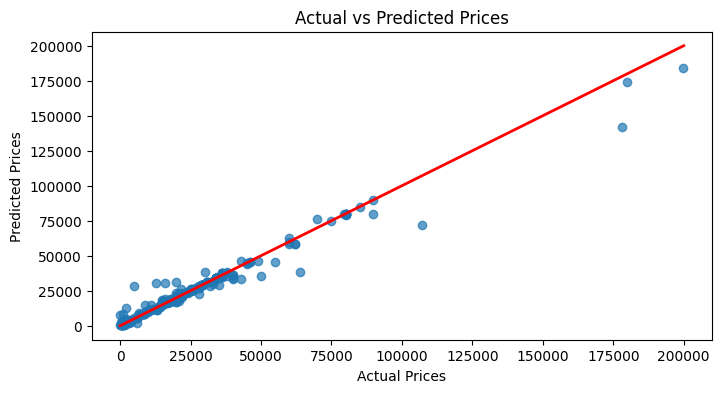

In [26]:
### import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Line for perfect predictions
plt.show()

### Exploratory Data Analysis

In [84]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load the dataset
data = pd.read_csv('dataset.csv')

# Clean text function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]  # Remove stopwords
    #ps = PorterStemmer()  # Initialize stemmer
    #tokens = [ps.stem(word) for word in tokens]  # Stem words
    return ' '.join(tokens)

data['clean_title'] = data['Title'].apply(clean_text)
data.head()

,Title,Rating,Reviews,Price,Image URL,Product URL,clean_title
0,"Redmi Note 13 Pro+ (Fusion Black, 8GB RAM, 256...",3.8,684,"33,999",https://m.media-amazon.com/images/I/71nrf4zgq5...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,redmi note 13 pro fusion black 8gb ram 256gb s...
1,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",3.8,60,"9,999",https://m.media-amazon.com/images/I/81T3olLXpU...,https://www.amazon.in/Samsung-Storage-Display-...,samsung galaxy m05 mint green 4gb ram 64 gb st...
2,"realme NARZO N61 (Marble Black,6GB RAM+128GB S...",4.1,346,"10,999",https://m.media-amazon.com/images/I/71EN6N9kUE...,https://www.amazon.in/realme-Storage-Comfort-R...,realme narzo n61 marble black6gb ram128gb stor...
3,"realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...",4.1,346,"10,999",https://m.media-amazon.com/images/I/71r0Ysx+oV...,https://www.amazon.in/realme-Storage-Comfort-R...,realme narzo n61 voyage blue6gb ram128gb stora...
4,POCO C61 Ethereal Blue 4GB RAM 64GB ROM,3.5,27,"8,999",https://m.media-amazon.com/images/I/712tqhtIw1...,https://www.amazon.in/POCO-C61-Ethereal-Blue-6...,poco c61 ethereal blue 4gb ram 64gb rom


In [86]:
from collections import Counter

# Tokenize titles
data['tokenized_title'] = data['clean_title'].apply(word_tokenize)
print(data.head())

# Calculate word frequencies
word_freq = Counter()
for tokens in data['tokenized_title']:
    word_freq.update(tokens)

# Create DataFrame for word frequencies and average prices
word_data = []
for word, freq in word_freq.items():
    avg_price = data[data['tokenized_title'].apply(lambda x: word in x)]['Price'].apply(convert_price).mean()
    word_data.append((word, freq, avg_price))

word_df = pd.DataFrame(word_data, columns=['Word', 'Frequency', 'Average_Price'])

# Sort by average price
word_df = word_df.sort_values(by='Frequency', ascending=False)
print(word_df)


                                               Title Rating Reviews   Price  \
0  Redmi Note 13 Pro+ (Fusion Black, 8GB RAM, 256...    3.8     684  33,999   
1  Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...    3.8      60   9,999   
2  realme NARZO N61 (Marble Black,6GB RAM+128GB S...    4.1     346  10,999   
3  realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...    4.1     346  10,999   
4            POCO C61 Ethereal Blue 4GB RAM 64GB ROM    3.5      27   8,999   

                                           Image URL  \
0  https://m.media-amazon.com/images/I/71nrf4zgq5...   
1  https://m.media-amazon.com/images/I/81T3olLXpU...   
2  https://m.media-amazon.com/images/I/71EN6N9kUE...   
3  https://m.media-amazon.com/images/I/71r0Ysx+oV...   
4  https://m.media-amazon.com/images/I/712tqhtIw1...   

                                         Product URL  \
0  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...   
1  https://www.amazon.in/Samsung-Storage-Display-...   
2  https://www.amazo

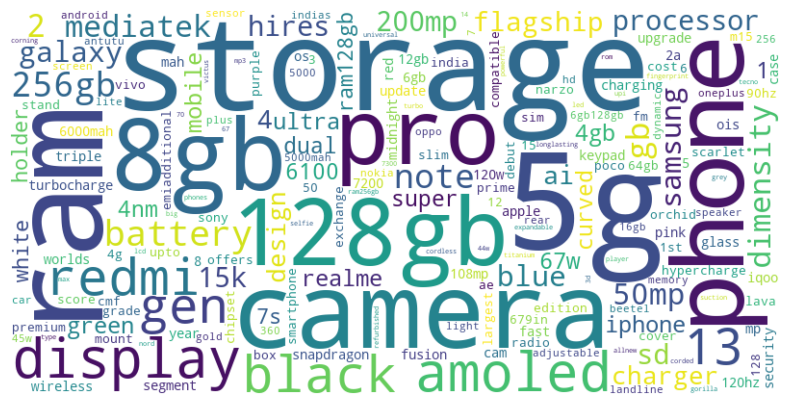

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [93]:
# Vectorize bi-grams (two-word phrases)
vectorizer_ngram = CountVectorizer(ngram_range=(2, 2))
title_bigrams = vectorizer_ngram.fit_transform(data['clean_title'])
bigram_counts = title_bigrams.toarray().sum(axis=0)

# Create DataFrame for bi-grams
bigram_freq = pd.DataFrame({'Bigram': vectorizer_ngram.get_feature_names_out(), 'Frequency': bigram_counts})
bigram_freq = bigram_freq.sort_values(by='Frequency', ascending=False)

# Display top bi-grams
print(bigram_freq.head(10))

             Bigram  Frequency
760         8gb ram        395
96    128gb storage        381
3929      ram 128gb        375
4033     redmi note        234
259   256gb storage        228
3369        note 13        226
3932      ram 256gb        215
122          13 pro        215
2492   hires camera        173
216     200mp hires        173


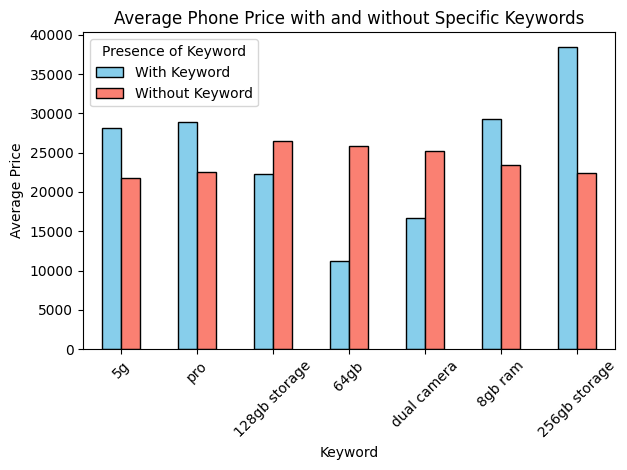

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Define keywords of interest
keywords = ['5g', 'pro', '128gb storage', '64gb', 'dual camera', '8gb ram', '256gb storage']

# Calculate average price for titles containing each keyword
keyword_price = {}
for keyword in keywords:
    # Filter titles containing the keyword
    contains_keyword = data['clean_title'].str.contains(keyword, case=False)
    
    # Calculate average price for titles with and without the keyword
    avg_price_with_keyword = data[contains_keyword]['Price'].replace(',', '', regex=True).astype(float).mean()
    avg_price_without_keyword = data[~contains_keyword]['Price'].replace(',', '', regex=True).astype(float).mean()
    
    keyword_price[keyword] = {'With Keyword': avg_price_with_keyword, 'Without Keyword': avg_price_without_keyword}

# Convert results to DataFrame
keyword_price_df = pd.DataFrame(keyword_price).T

# Plotting the data
keyword_price_df.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Average Phone Price with and without Specific Keywords')
plt.xlabel('Keyword')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Presence of Keyword')
plt.tight_layout()

# Show the plot
plt.show()